In [2]:
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from numpy import random
from pandas import DataFrame

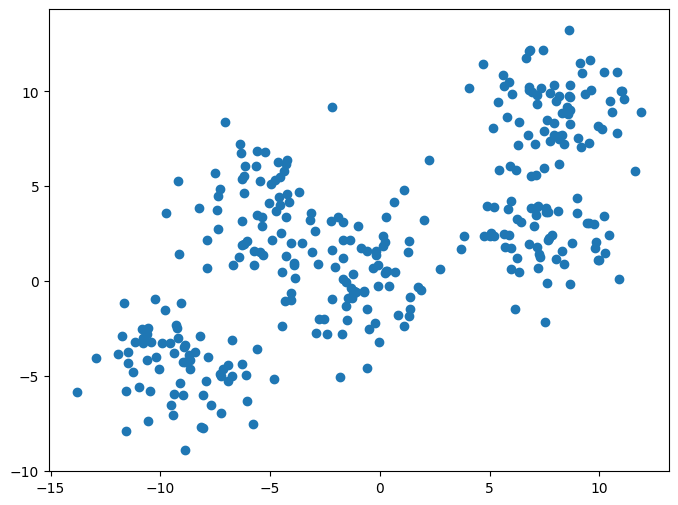

In [3]:
random.seed(234)
x, _ = make_blobs(n_samples=330, centers=5, cluster_std=1.84)
plt.figure(figsize=(8, 6))
plt.scatter(x[:,0], x[:,1])
plt.show()

In [4]:
gm = GaussianMixture(n_components=5).fit(x)

gm.get_params()

{'covariance_type': 'full',
 'init_params': 'kmeans',
 'max_iter': 100,
 'means_init': None,
 'n_components': 5,
 'n_init': 1,
 'precisions_init': None,
 'random_state': None,
 'reg_covar': 1e-06,
 'tol': 0.001,
 'verbose': 0,
 'verbose_interval': 10,
 'warm_start': False,
 'weights_init': None}

In [5]:
centers = gm.means_
print(centers)

[[-5.55836831  3.87299888]
 [ 7.28418475  2.56387124]
 [-0.90246061  0.16230294]
 [-9.18288987 -4.47852917]
 [ 8.11454324  9.24741885]]


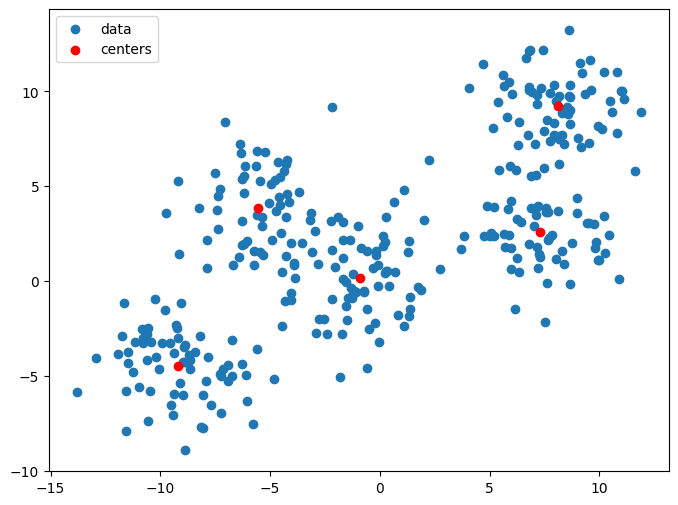

In [6]:
plt.figure(figsize=(8, 6))
plt.scatter(x[:,0], x[:,1], label="data")
plt.scatter(centers[:,0], centers[:,1],c='r', label="centers")
plt.legend()
plt.show()

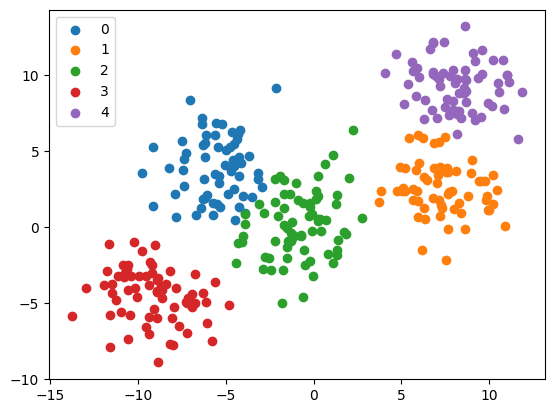

In [7]:
pred = gm.predict(x)

df = DataFrame({'x':x[:,0], 'y':x[:,1], 'label':pred})
groups = df.groupby('label')

ig, ax = plt.subplots()
for name, group in groups:
    ax.scatter(group.x, group.y, label=name)

ax.legend()
plt.show()

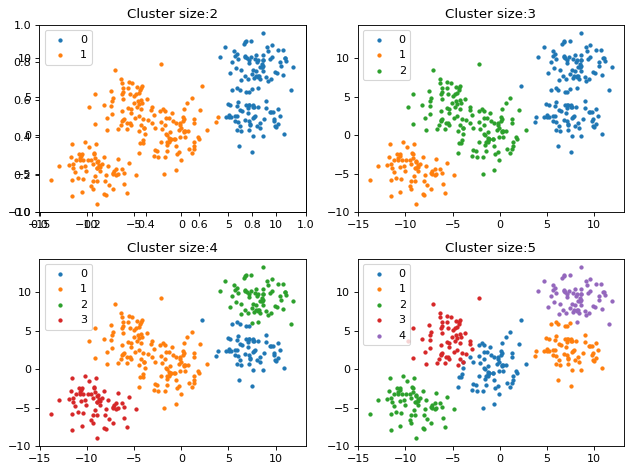

In [9]:
f = plt.figure(figsize=(8, 6), dpi=80)
f.add_subplot(2, 2, 1)
for i in range(2, 6):
 gm = GaussianMixture(n_components=i).fit(x)
 pred = gm.predict(x)
 df = DataFrame({'x':x[:,0], 'y':x[:,1], 'label':pred})
 groups = df.groupby('label')
 f.add_subplot(2, 2, i-1)
 for name, group in groups:
    plt.scatter(group.x, group.y, label=name, s=8)
    plt.title("Cluster size:" + str(i))
    plt.legend()

plt.tight_layout()
plt.show()